In [13]:
import pandas as pd
import numpy as np
from sklearn import *
import pysubgroup as ps
import matplotlib.pyplot as plt

In [ ]:
!ls ../..
!echo 
!ls ../../input

In [154]:
# read in data
iteration=0
train = False
model = "catboost-ve"
model_str = model if not train else "{0}-train".format(model)
dataset = "trauma_uk" 

#uncertainty-info_catboost-ve_trauma_uk
#uncertainty-info_catboost-ve-train_trauma_uk
# fn = "../../input/{0}/uncertainty-info_{1}_{2}.csv".format(iteration, model_str, dataset)
fn = "../../input/VarianceMapperResults_raw_trauma_uk_catboost-ve.csv"
df = pd.read_csv(fn, index_col="Unnamed: 0")
#drop truth column
df = df.drop(["truth", "correct", "p(positive class)", "ratio 1 predicted", "rate corrected predicted", "class uncertainty", "pred_likelihood"], axis=1)


display(df)



,uncertainty,TRAUMATYPE,SYSBP,RR,GCS,EDMOTOR,SI,SIRANK,AGE,SEX,...,AnatomicalAMPT,PhysiologicalAMPT,LungAMPT,AMPT,Mechanism,RTSCode,AgeGroups,SBPCode,MotorCode,AMPT2
6162,0.002292,0.0,0.0,0.0,3.0,1.0,1.000000,2.0,39.0,0.0,...,1.0,1.0,1.0,6.0,0.0,1.0,4.0,1.0,1.0,1.0
7986,0.002295,0.0,77.0,0.0,7.0,4.0,1.000000,2.0,23.0,0.0,...,1.0,1.0,1.0,6.0,0.0,1.0,4.0,1.0,1.0,1.0
9897,0.003247,0.0,0.0,0.0,3.0,1.0,1.000000,2.0,47.0,0.0,...,1.0,1.0,1.0,7.0,1.0,1.0,4.0,1.0,1.0,1.0
16099,0.004139,0.0,61.0,0.0,3.0,1.0,1.000000,2.0,40.0,0.0,...,1.0,1.0,1.0,7.0,0.0,1.0,4.0,1.0,1.0,1.0
12723,0.005094,0.0,146.0,0.0,5.0,3.0,0.719178,2.0,64.0,0.0,...,1.0,1.0,1.0,6.0,1.0,1.0,5.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,0.693147,0.0,124.0,0.0,3.0,1.0,0.750000,2.0,21.0,0.0,...,0.0,1.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0
8874,0.693147,0.0,151.0,20.0,15.0,6.0,0.907285,2.0,15.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
3762,0.693147,1.0,116.0,0.0,3.0,1.0,0.827586,2.0,40.0,1.0,...,0.0,1.0,0.0,2.0,1.0,1.0,4.0,0.0,1.0,1.0
18689,0.693147,0.0,122.0,16.0,14.0,6.0,1.000000,2.0,32.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0


In [155]:
# pysubgroup code for discrete

n_bins = 9
df = df.sort_values(by="uncertainty", ascending=True)
bins = pd.qcut(df['uncertainty'], q=n_bins, labels=list(range(n_bins)))
bins.rename("uncertainty group", inplace=True)
display(bins)


df_new = df # df.drop("uncertainty", axis=1)
df_new = pd.concat([df_new, bins], axis=1)

display(df_new)


6162     0
7986     0
9897     0
16099    0
12723    0
        ..
7353     8
8874     8
3762     8
18689    8
13684    8
Name: uncertainty group, Length: 18774, dtype: category
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]

,uncertainty,TRAUMATYPE,SYSBP,RR,GCS,EDMOTOR,SI,SIRANK,AGE,SEX,...,PhysiologicalAMPT,LungAMPT,AMPT,Mechanism,RTSCode,AgeGroups,SBPCode,MotorCode,AMPT2,uncertainty group
6162,0.002292,0.0,0.0,0.0,3.0,1.0,1.000000,2.0,39.0,0.0,...,1.0,1.0,6.0,0.0,1.0,4.0,1.0,1.0,1.0,0
7986,0.002295,0.0,77.0,0.0,7.0,4.0,1.000000,2.0,23.0,0.0,...,1.0,1.0,6.0,0.0,1.0,4.0,1.0,1.0,1.0,0
9897,0.003247,0.0,0.0,0.0,3.0,1.0,1.000000,2.0,47.0,0.0,...,1.0,1.0,7.0,1.0,1.0,4.0,1.0,1.0,1.0,0
16099,0.004139,0.0,61.0,0.0,3.0,1.0,1.000000,2.0,40.0,0.0,...,1.0,1.0,7.0,0.0,1.0,4.0,1.0,1.0,1.0,0
12723,0.005094,0.0,146.0,0.0,5.0,3.0,0.719178,2.0,64.0,0.0,...,1.0,1.0,6.0,1.0,1.0,5.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,0.693147,0.0,124.0,0.0,3.0,1.0,0.750000,2.0,21.0,0.0,...,1.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0,8
8874,0.693147,0.0,151.0,20.0,15.0,6.0,0.907285,2.0,15.0,1.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,8
3762,0.693147,1.0,116.0,0.0,3.0,1.0,0.827586,2.0,40.0,1.0,...,1.0,0.0,2.0,1.0,1.0,4.0,0.0,1.0,1.0,8
18689,0.693147,0.0,122.0,16.0,14.0,6.0,1.000000,2.0,32.0,1.0,...,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,8


In [ ]:
# # target = "uncertainty group 0"
# def subgroup_disc_discrete(target, n_bins, df):
#     ignore_lst = ["uncertainty group {0}".format(i) for i in range(n_bins)]
#     target = ps.BinaryTarget(target, True)
#     searchspace = ps.create_selectors(df, ignore=ignore_lst)
#     task = ps.SubgroupDiscoveryTask (
#         df,
#         target,
#         search_space= searchspace,
#         result_set_size=1,
#         # depth=2,
#         qf=ps.WRAccQF())
#     result = ps.BeamSearch().execute(task)

#     return result.to_descriptions()
# desc = []
# for i in range(n_bins):
#     desc.extend(subgroup_disc_discrete("uncertainty group {0}".format(i), n_bins, df_new))
# # display(subgroup_disc_discrete("uncertainty group 1", n_bins, df_new))

In [162]:
def subgroup_disc_numeric(target, df):
    target = ps.NumericTarget(target)
    searchspace = ps.create_selectors(df, ignore=["uncertainty"])
    m = np.mean(df["uncertainty"])
    print(m)
    task = ps.SubgroupDiscoveryTask (
        df,
        target,
        search_space= searchspace,
        # result_set_size=3,
        # depth=2,
        qf= ps.StandardQFNumeric(0.5))
    result = ps.BeamSearch().execute(task)

    return result

res = subgroup_disc_numeric("uncertainty", df)
desc = res.to_descriptions()
display(desc)

0.34110880101797736


[(13.385242849114855, (AMPT: [1.0:2.0[ and RRAMPT==0.0 and TRAUMATYPE==0.0)),
 (13.30555205329585, (AMPT: [1.0:2.0[ and RRAMPT==0.0)),
 (13.30555205329585, (AMPT2==0.0 and AMPT: [1.0:2.0[ and RRAMPT==0.0)),
 (13.284516544606458, (AMPT: [1.0:2.0[ and FlailAMPT==0.0 and RRAMPT==0.0)),
 (13.28150054495686, (AMPT: [1.0:2.0[ and RRAMPT==0.0 and SCIAMPT==0.0)),
 (13.152382561148348, (AMPT: [1.0:2.0[ and RRAMPT==0.0 and SBPCode==0.0)),
 (12.757900831358247, (AMPT2==0.0 and AMPT: [1.0:2.0[ and TRAUMATYPE==0.0)),
 (12.757900831358247, (AMPT: [1.0:2.0[ and TRAUMATYPE==0.0)),
 (12.736289935709006, (AMPT: [1.0:2.0[ and SCIAMPT==0.0 and TRAUMATYPE==0.0)),
 (12.736202409551478,
  (AMPT: [1.0:2.0[ and FlailAMPT==0.0 and TRAUMATYPE==0.0))]

In [163]:
count = 0
res = {}
for cn in desc:
    cn = cn[1]
    cv = cn.covers(df)
    s = df.iloc[cv]
    print(np.min(s["uncertainty"]), np.max(s["uncertainty"]))
    count += 1

res = pd.DataFrame(res)
display(res)
res = pd.concat([df.reset_index(drop=True), res], axis=1)
display(res)

0.0483381689554833 0.6931471381389789
0.0483381689554833 0.6931471381389789
0.0483381689554833 0.6931471381389789
0.0483381689554833 0.6931471381389789
0.0483381689554833 0.6931471381389789
0.0483381689554833 0.6931471381389789
0.0248240554935268 0.6931471381389789
0.0248240554935268 0.6931471381389789
0.0248240554935268 0.6931471381389789
0.0248240554935268 0.6931471381389789


""


,uncertainty,TRAUMATYPE,SYSBP,RR,GCS,EDMOTOR,SI,SIRANK,AGE,SEX,...,AnatomicalAMPT,PhysiologicalAMPT,LungAMPT,AMPT,Mechanism,RTSCode,AgeGroups,SBPCode,MotorCode,AMPT2
0,0.002292,0.0,0.0,0.0,3.0,1.0,1.000000,2.0,39.0,0.0,...,1.0,1.0,1.0,6.0,0.0,1.0,4.0,1.0,1.0,1.0
1,0.002295,0.0,77.0,0.0,7.0,4.0,1.000000,2.0,23.0,0.0,...,1.0,1.0,1.0,6.0,0.0,1.0,4.0,1.0,1.0,1.0
2,0.003247,0.0,0.0,0.0,3.0,1.0,1.000000,2.0,47.0,0.0,...,1.0,1.0,1.0,7.0,1.0,1.0,4.0,1.0,1.0,1.0
3,0.004139,0.0,61.0,0.0,3.0,1.0,1.000000,2.0,40.0,0.0,...,1.0,1.0,1.0,7.0,0.0,1.0,4.0,1.0,1.0,1.0
4,0.005094,0.0,146.0,0.0,5.0,3.0,0.719178,2.0,64.0,0.0,...,1.0,1.0,1.0,6.0,1.0,1.0,5.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769,0.693147,0.0,124.0,0.0,3.0,1.0,0.750000,2.0,21.0,0.0,...,0.0,1.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,1.0
18770,0.693147,0.0,151.0,20.0,15.0,6.0,0.907285,2.0,15.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
18771,0.693147,1.0,116.0,0.0,3.0,1.0,0.827586,2.0,40.0,1.0,...,0.0,1.0,0.0,2.0,1.0,1.0,4.0,0.0,1.0,1.0
18772,0.693147,0.0,122.0,16.0,14.0,6.0,1.000000,2.0,32.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0


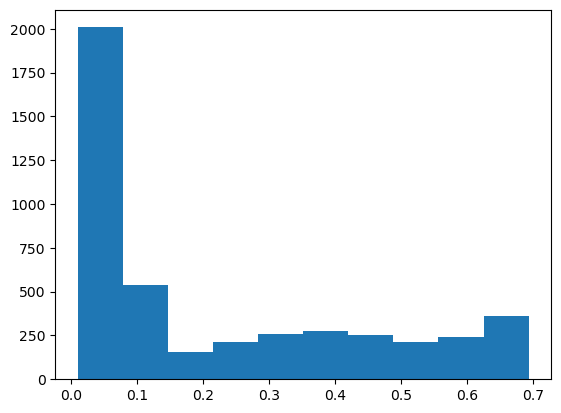

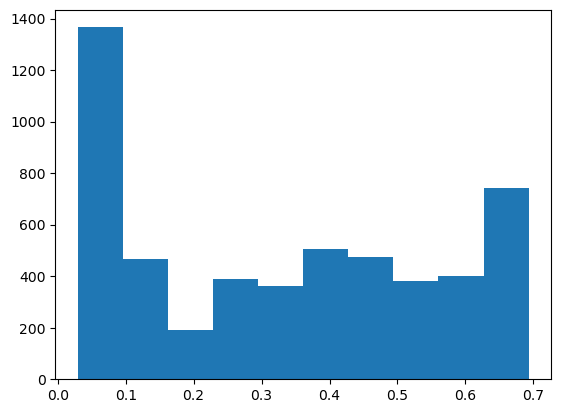

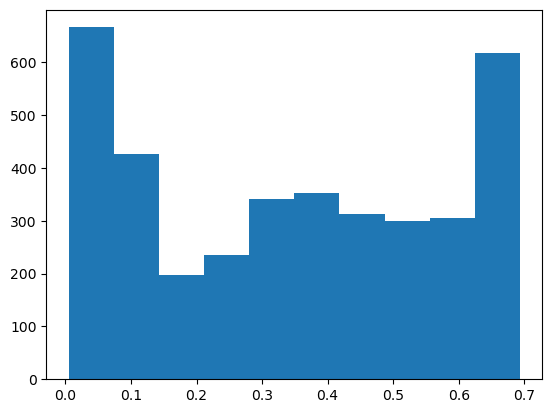

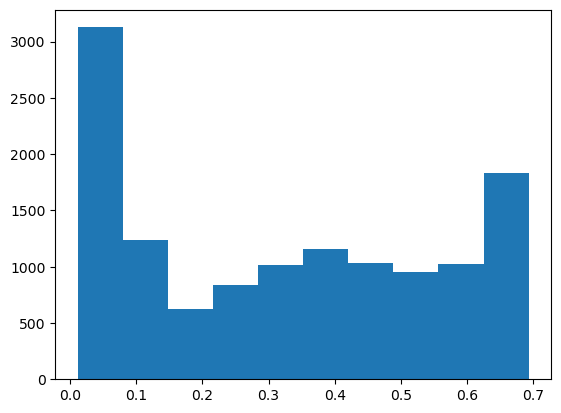

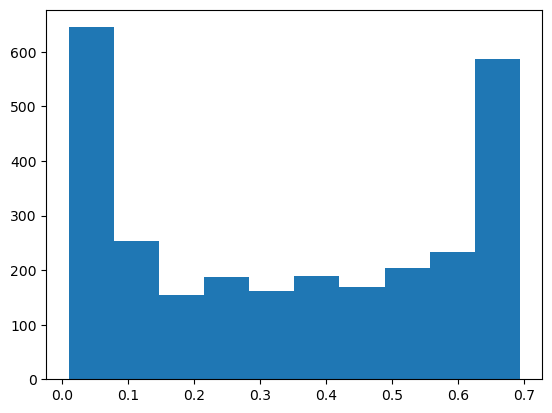

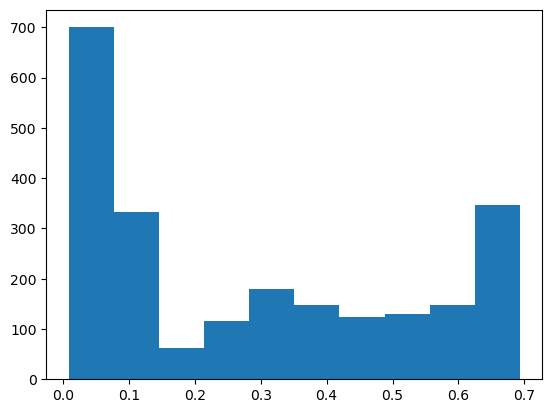

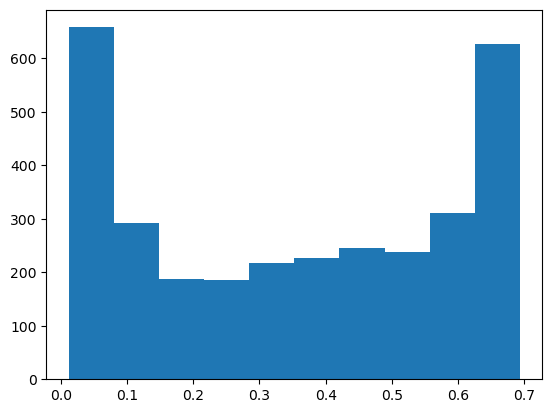

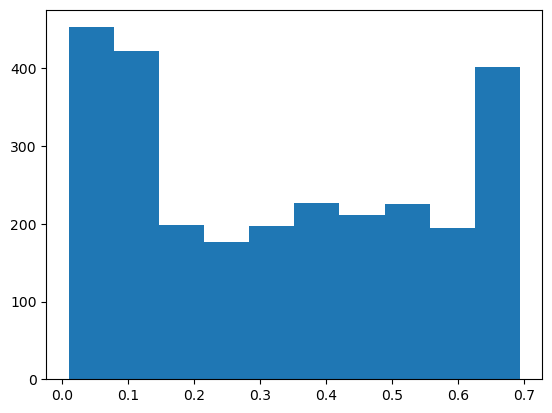

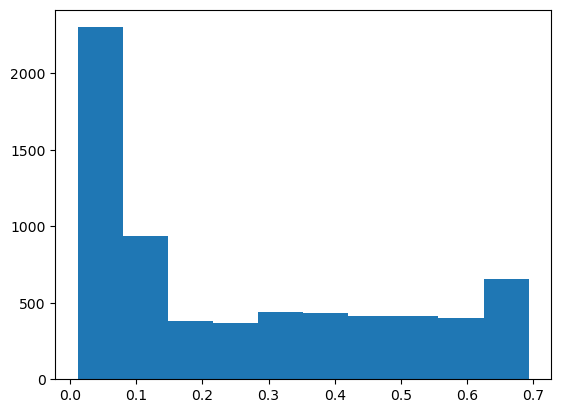

In [109]:
for i in range(len(desc)):
    sub_1 = res[res["subgroup {0}".format(i)] == True]
    plt.hist(sub_1['uncertainty'])
    plt.show()